# Лабораторная работа №2: Классические методы математической статистики
Выполнил студент гр. 1384 Овчинников Максим. Вариант №11

## Цель работы
Научится применять методы математической статистики для визуализации и анализа полученных данных; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

1. Выборочный аналог математического ожидания
$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$

2. Выборочный аналог дисперсии и СКО
$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$

$S=\sqrt{S^2}$



3. Выборочный коэффициент асимметрии
$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$

4. Выборочный коэффициент эксцесса:
$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$

5. Метод максимального правдоподобия - это метод оценивания неизвестного параметра путём максимизации функции правдоподобия
$L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$

6. Метод моментов — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

7. Статистика критерия Колмагорова
$D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

8. Теорема Колмагорова

$\sqrt{n}D_n \rightarrow K$, при основной гипотезе

9. Критерий $\chi^2$ для проверки гипотез

Разбиваем множество значений случайной величины на r непересекающихся интервалов, которые покроют все возможные значения СВ.

$p_{i}$ - теоретическая вероятность попадания СВ в i-ый интервал при нулевой гипотезе.

$n_{i}$ - количество значений выборки, попавших в i-ый интервал

Сравниваем относительную и теоретическую частоты.

$\chi^{2}_в = \sum_{i=1}^{N}  \frac{(n_i-np_i)^2}{np_i}  $

Если $\chi^{2}_в >\chi^2_{1 - \alpha, r - 1}$, где

$r$ - кол-во интервалов, то гипотезу отвергаем. Если $\chi^{2}_в <\chi^2_{1 - \alpha, r - 1}$ - не отвергаем.


10. Наиболее мощный критерий простой гипотезы

Для нулевой гипотезы $H_{0}: \theta=\theta_{0}$ и альтернативной гипотезы $H_{А}: \theta=\theta_{A}$, где $\theta_{0}$ и $\theta_{A}$ - фиксированные параметры, строим статистику правдоподобия:

$LR(\overrightarrow{X},\theta_{A},\theta_{0})=\frac{L(\overrightarrow{X},\theta_{A})}{L(\overrightarrow{X},\theta_{0})}$ - статистика отношений правдоподобия,$L(\overrightarrow{X},\theta)$ - соответствующие функции максимального правдоподобия.

Наиболее мощный критерий представляется в виде


$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$

где константа с и вероятность $ p \in [0,1) $ находятся из уравнения

$  E_{θ_0}ϕ(x)=P_{θ_0}(LR(X)>c)+pP_{θ_0}(LR(X)=c)=α$

Причем:

- константа с находится однозначно

- если $ P_{θ_0}(LR(X)=c)>0 $, то $ p \in [0,1) $ находится однозначно

- в области $ LR(X) \neq c $ критерий $ϕ$ определен однозначно

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание № 1

#### а) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [521]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from collections import Counter
data = np.array([0, 0, 0, 4, 0, 1, 4, 10, 4, 0, 3, 2, 0, 0, 0, 4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0])

# Вариационный ряд
sorted_data = sorted(data)
print(sorted_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 10]


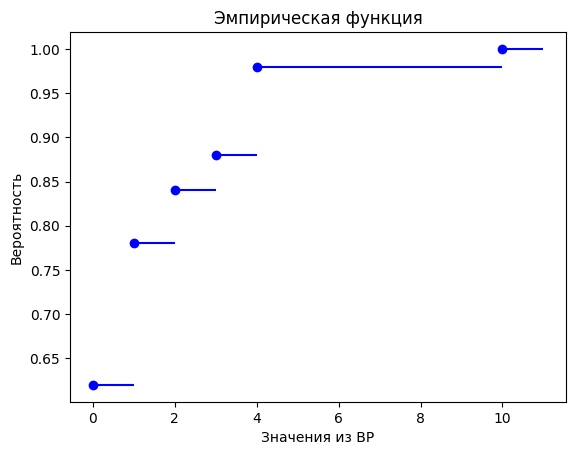

In [522]:
# Построение эмпирической функции распределения

# variation_series - пары, где ключ - элемент из sorted_data, а значение - количество повторений элемента
variation_series = list(Counter(sorted_data).items())

x = [item[0] for item in variation_series]
y = np.cumsum([item[1] for item in variation_series]) / len(data)

for i in range(max(sorted_data) + 1):
    if not any(element[0] == i for element in variation_series):
        variation_series.append((i, 0))

variation_series = sorted(variation_series, key=lambda x: x[0])

plt.title('Эмпирическая функция')
plt.xlabel('Значения из ВР')
plt.ylabel('Вероятность')

for i in range(len(x)):
    plt.plot(x[i], y[i], marker='o', color='blue')
    if i == 0:
        plt.hlines(y[i], 0, x[i + 1], linestyle='-', color='blue')
    elif i == (len(x) - 1):
        plt.hlines(y[i], x[i], x[i] + 1, linestyle='-', color='blue')
    else:
        plt.hlines(y[i], x[i], x[i+1], linestyle='-', color='blue')



plt.show()

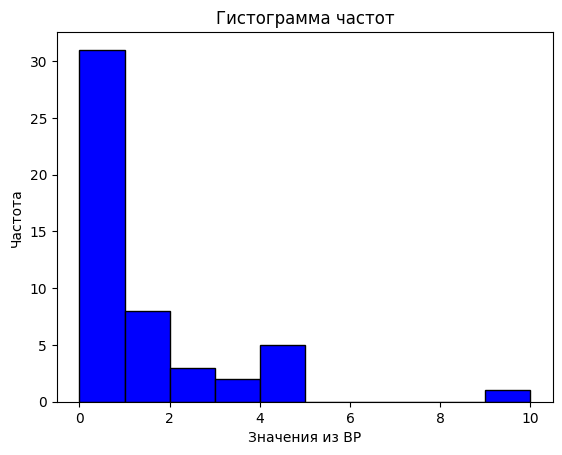

In [523]:
# Построение гистограммы частот

plt.title('Гистограмма частот')
plt.xlabel('Значения из ВР')
plt.ylabel('Частота')
plt.hist(sorted_data, range(min(sorted_data), max(sorted_data) + 1), color='blue', edgecolor='black')
plt.show()

#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математическое ожидание, (ii) дисперсия, (iii) СКО, (iv) медиана, (v) асимметрия, (vi) эксцесса (vii) вероятности $\mathbb{P}(X\in \left[ a, b \right])$ 


In [524]:
a = 0.0
b = 1.57

# (i) Математическое ожидание
mean_val = np.mean(data)
print(f"Математическое ожидание: {mean_val}")

# (ii) Дисперсия
variance_val = np.var(data)
print(f"Дисперсия: {variance_val}")

# (iii) СКО
std_val = np.std(data)
print(f"СКО: {std_val}")

# (iv) Медиана
median_val = np.median(data)
print(f"Медиана: {median_val}")

# (v) Асимметрия
skewness_val = stats.skew(data)
print(f"Асимметрия: {skewness_val}")

# (vi) Эксцесс
kurtosis_val = stats.kurtosis(data)
print(f"Эксцесс: {kurtosis_val}")

# # (vii) P(X в [a, b])
probability_val = np.mean((data >= a) & (data <= b))
print(f"P(X в [{a}, {b}]): {probability_val}")



Математическое ожидание: 1.0
Дисперсия: 3.36
СКО: 1.833030277982336
Медиана: 0.0
Асимметрия: 2.766691108349189
Эксцесс: 9.45748299319728
P(X в [0.0, 1.57]): 0.78


#### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Плотность распределения Пуассона: $\mathbb{P}_{\lambda}(X=k) = exp(-\lambda) \cdot \frac{\lambda^{k}}{k!}$

a) ОМП

Составим функцию правдоподобия
$L(\overrightarrow{X};\theta)
=\prod_{i=1}^{n}P_{\lambda}(X_{i})=
\prod_{i=1}^{n}exp(-\lambda)\cdot \frac{\lambda^{X_{i}}}{X_{i}!}=
exp(-n\cdot \lambda)\cdot\frac{\lambda^{ \sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}X_{i}!}$

Прологарифмируем функцию правдоподобия

$LL(\overrightarrow{X};\theta)=-n\cdot\lambda + \sum_{i=1}^{n}X_{i}\cdot\ln(\lambda) - ln\left(\prod_{i=1}^{n}X_{i}!\right)$

Найдем производную логарифма функции правдоподобия по параметру $\lambda$

$\frac{\partial}{\partial\lambda} LL(\overrightarrow{X};\theta) = \sum_{i=1}^{n}\left(-1 + \frac{X_{i}}{\lambda}\right)$

Приравняем производную к нулю и решим уравнение для нахождения оценки параметра $\lambda$

$\sum_{i=1}^{n}\left(-1 + \frac{X_{i}}{\lambda}\right) = 0$

$\widehat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}X_{i} = \overline{X}$ = 1

б) ОММ
Математическое ожидание для распределения Пуассона

$\mathbb{E}X = \lambda$

Выберем момент

$M_{1}=\overline{X}$

Получаем, что

$\widetilde{\lambda}=\overline{X}=\widetilde{\theta}=1$

Найдем смещение оценок

$\mathbb{E}\widetilde{\lambda} = \mathbb{E}\widehat{\lambda} = \frac{1}{n}\sum_{i=1}^n\mathbb{E}X_{i} = \frac{1}{n}\sum_{i=1}^n\lambda = \frac{1}{n}\cdot n\lambda = \lambda$

Получили смещение равное 0, оценка является несмещенной


#### d) Построить асимптотический  доверительный  интервал  уровня  значимости  $\alpha_{1}$ для  параметра  $\lambda$  на  базе  оценки максимального правдоподобия.

$\alpha_{1} = 0.05$

ОМП из прошлого пункта

$\widehat{\theta}=\overline{X}$

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$

Найдем информацию Фишера: 

$I_{n}(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)= \sum_{i=1}^n\left(\frac{1}{\lambda^{2}}\mathbb{E}(X_{i})\right) = \frac{n}{\lambda}$

$I(\theta) = \lim_{n \to \infty} \left(\frac{I_{n}(\theta)}{n}\right) = \frac{1}{\lambda}$

Тогда 

$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем 

$X_{\alpha_{1}}$: $\mathrm{Ф}(X_{\alpha_{1}})=1-\frac{\alpha_{1}}{2}=1-\frac{0.05}{2}=0.975$ 

Найдем $X_{0.05}$



In [525]:
X_alpha = stats.norm.ppf(0.975)

print(f'X_{0.05} = {X_alpha:.2f}')

X_0.05 = 1.96


Ассимптотический доверительный интервал

$\lambda \in \left[ \widehat{\theta}(\overrightarrow{X}) - \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}} , \widehat{\theta}(\overrightarrow{X}) + \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}}\right]$

$\lambda \in \left[ 1 - \frac{1.96}{\sqrt{50 \cdot \frac{1}{1}}} , 1 + \frac{1.96}{\sqrt{50 \cdot \frac{1}{1}}}\right]$

In [526]:
a = 1.96 / np.sqrt(50);

print("Ассимптотический доверительный интервал параметра λ")
print(f'{1-a} <= λ <= {1+a}')

Ассимптотический доверительный интервал параметра λ
0.7228141417748735 <= λ <= 1.2771858582251265


#### e)	Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_{0}$.  Проверить  гипотезу  на  уровне  значимости  $\alpha_{1}$.  Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [527]:

def hypothesisTest(lambda_0, alpha_1, df):
    # Подсчет наблюдаемых частот был произведен ранее и записан в variation_series
    print(f"Наблюдаемые частоты: {variation_series}")
    
    
    # Подсчет ожидаемых частот для распределения Пуассона
    # ожидаемые частоты еденичных интервалов вида [value, value + 1)
    expected_freq = [math.exp(-lambda_0) * lambda_0**variation_series[i][0] / math.factorial(variation_series[i][0]) for i in range(len(variation_series) - 1)]
    
    # ожидаемая частота последнего интервала [max_value, +inf)
    expected_freq.append(1 - sum(expected_freq));
    
    print(f"Ожидаемые частоты: {expected_freq}")
    print(f"Сумма частот: {sum(expected_freq)}")
    
    # Вычисление критерия chi^2
    chi = 0
    for i in range(len(variation_series)):
        chi += ((variation_series[i][1] - len(data)*expected_freq[i])**2) / (len(data)*expected_freq[i])
    
    
    # Критическое значение chi^2
    x_alpha = stats.chi2.ppf(1 - alpha_1, df)
    
    
    print(f"Критерий X^2: {chi}")
    print(f"Критическое значение: {x_alpha}")
    
    
    print(f"p value= {1 - stats.chi2.cdf(chi, df)}")
    print(stats.chi2.ppf(1-10**(-16), df))
    print(stats.chi2.ppf(1-10**(-17), df))

hypothesisTest(lambda_0=4, alpha_1=0.05, df=len(variation_series) - 1)


Наблюдаемые частоты: [(0, 31), (1, 8), (2, 3), (3, 2), (4, 5), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1)]
Ожидаемые частоты: [0.01831563888873418, 0.07326255555493671, 0.14652511110987343, 0.19536681481316456, 0.19536681481316456, 0.15629345185053165, 0.1041956345670211, 0.059540362609726345, 0.029770181304863173, 0.013231191691050298, 0.00813224279693403]
Сумма частот: 1.0
Критерий X^2: 1023.5044305797758
Критическое значение: 18.307038053275146
p value= 0.0
98.4548638916761
inf


$\mathcal{X^{2}} > \mathcal{X_{0.05, 10}} \rightarrow$ гипотеза отвергается.

Критическое значение не доходит до значения критерия даже при уровне значимости $10^{-16}$, значит наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу очень близок к нулю.

#### f) Построить критерий значимости $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

В качестве параметра возьмем оценку ОМП $ \widehat{λ}= \overline{X}=1 $

In [528]:
hypothesisTest(lambda_0=1, alpha_1=0.05, df=len(variation_series) - 2)

Наблюдаемые частоты: [(0, 31), (1, 8), (2, 3), (3, 2), (4, 5), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1)]
Ожидаемые частоты: [0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05, 9.123994076672677e-06, 1.0137771196302974e-06, 1.1142547839959605e-07]
Сумма частот: 1.0
Критерий X^2: 179532.78933821415
Критическое значение: 16.918977604620448
p value= 0.0
95.79817039503867
inf


Значение критерия получилось еще больше, чем в прошлом пункте, гипотеза отвергается. Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу очень близок к нулю

#### g) Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_{0}$ при альтернативе пуассоновости с параметром $\lambda = \lambda_{1}$. Проверить гипотезу на уровне значимости $\alpha_{1}$. Что получится, если поменять местами основную и альтернативную гипотезы?

Основная гипотеза
$H_{0}: \lambda = \lambda_{0} = 4.0$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{1} = 1.0$

$L(\overrightarrow{X};\lambda)=exp(-n\cdot \lambda)\cdot\frac{\lambda^{ \sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}X_{i}!}$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_0, \lambda_1) = \left(\frac{\lambda_1}{\lambda_0}\right)^{\sum_{i = 1}^{n}X_{i}} \cdot \exp(n(\lambda_0 - \lambda_1) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=λ_0, \sigma^{2}=λ_0$

$ \sqrt{n} \frac{ \overline{X}-λ_0}{\sqrt{λ_0}} \sim N(0,1)$

$ P(\sqrt{n} \frac{ \overline{X}-λ_0}{\sqrt{λ_0}} ≥ \sqrt{n} \frac{ c^*-λ_0}{\sqrt{λ_0}})=1-Ф(\sqrt{n} \frac{ c^*-λ_0}{\sqrt{λ_0}})= α$

$\sqrt{n} \frac{ c^*-λ_0}{\sqrt{λ_0}}=x_α$

$x_α: Ф(x_α)=1-α $

In [529]:
print(f'Квантиль N(0,1) с уровнем доверия 1 - alpha_1: {stats.norm.ppf(0.95, loc=0, scale=1)}')

Квантиль N(0,1) с уровнем доверия 1 - alpha_1: 1.6448536269514722


Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - 4}{2} = 1.645$

$c^{*} = 4.47$

$\overline{X} = 1.0$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 

Поменяем гипотезы местами

Основная гипотеза
$H_{0}: \lambda = \lambda_{1} = 1.0$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{0} = 4.0$

$L(\overrightarrow{X};\lambda)=exp(-n\cdot \lambda)\cdot\frac{\lambda^{ \sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}X_{i}!}$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_1, \lambda_0) = \left(\frac{\lambda_0}{\lambda_1}\right)^{\sum_{i = 1}^{n}X_{i}} \cdot \exp(n(\lambda_0 - \lambda_1) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=λ_0, \sigma^{2}=λ_0$

$ \sqrt{n} \frac{ \overline{X}-λ_1}{\sqrt{λ_1}} \sim N(0,1)$

$ P(\sqrt{n} \frac{ \overline{X}-λ_1}{\sqrt{λ_1}} ≥ \sqrt{n} \frac{ c^*-λ_1}{\sqrt{λ_1}})=1-Ф(\sqrt{n} \frac{ c^*-λ_1}{\sqrt{λ_1}})= α$

$\sqrt{n} \frac{ c^*-λ_1}{\sqrt{λ_1}}=x_α$

$x_α: Ф(x_α)=1-α $

$x_a = 1.645$

Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - 1}{1} = 1.645$

$c^{*} = 1.23$

$\overline{X} = 1.0$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 


#### h) В пунктах (c)–(f) заменить семейство распределений Пуассона на семейство геометрических распределений $\mathbb{P}_{\lambda}(X = k) = \frac{\lambda^{k}}{(\lambda + 1)^{k+1}} k \in \mathbb{Z}_+$

#### h.c) 

a) ОМП

Составим функцию правдоподобия
$L(\overrightarrow{X};\theta)
=\prod_{i=1}^{n}P_{\lambda}(X_{i})=
\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda + 1)^{X_{i}+1}}=
\frac{\lambda^{\sum_{i = 1}^{n}X_{i}}}{(\lambda + 1)^{\sum_{i = 1}^{n}X_{i}+n}}$

Прологарифмируем функцию правдоподобия

$LL(\overrightarrow{X};\theta)= \sum_{i=1}^n X_i \cdot \ln(\lambda) - (\sum_{i=1}^n X_i+n) \cdot \ln(\lambda+1)$

Найдем производную логарифма функции правдоподобия по параметру $\lambda$

$\frac{\partial}{\partial\lambda} LL(\overrightarrow{X};\theta) = \frac{\sum_{i=1}^n X_i}{\lambda} - \frac{\left(\sum_{i=1}^n X_i+n\right)}{\lambda+1}$

Приравняем производную к нулю и решим уравнение для нахождения оценки параметра $\lambda$

$\frac{\sum_{i=1}^n X_i}{\lambda} - \frac{\left(\sum_{i=1}^n X_i+n\right)}{\lambda+1} = 0$

$\sum_{i=1}^n X_i \cdot (\lambda + 1) - \lambda\sum_{i=1}^n X_i + \lambda n = 0$

$\widehat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}X_{i} = \overline{X}$ = 1

б) ОММ

Математическое ожидание для данного распределения

$\mathbb{E}X = \frac{1}{\lambda}$

Выберем первый момент

$M_{1}=\frac{1}{\overline{X}}$

Получаем, что

$\widetilde{\lambda}=\overline{X}=\widetilde{\theta}=1$

Найдем смещение оценок

$\mathbb{E}\widetilde{\lambda} = \mathbb{E}\widehat{\lambda} = \frac{1}{n}\sum_{i=1}^n\mathbb{E}X_{i} = \frac{1}{n}\sum_{i=1}^n\lambda = \frac{1}{n}\cdot n\lambda = \lambda$

Оценка является несмещенной


#### h.d) 
$\alpha_{1} = 0.05$

ОМП из прошлого пункта

$\widehat{\theta}=\overline{X}$

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$

Найдем информацию Фишера: 

$I_{n}(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^n X_i}{\lambda^{2}} + \frac{\left(\sum_{i=1}^n X_i+n\right)}{\left(\lambda+1\right)^2} \right)= 
\frac{1}{\lambda^{2}}\sum_{i=1}^{n}\mathbb{E}X_{i} - \frac{1}{\left(\lambda + 1\right)^{2}}\sum_{i=1}^{n}\mathbb{E}X_{i} - \frac{n}{\left(\lambda + 1\right)^{2}} = 
\frac{n}{\lambda^{3}} - \frac{n}{\left(\lambda + 1\right)^{2}\lambda} - \frac{n}{\left(\lambda + 1\right)^{2}}$


$I(\theta) = \lim_{n \to \infty} \left(\frac{I_{n}(\theta)}{n}\right) = \frac{1}{\lambda^{3}} - \frac{1}{\left(\lambda + 1\right)^{2}\lambda} - \frac{1}{\left(\lambda + 1\right)^{2}}$

Тогда 

$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем 

$X_{\alpha_{1}}$: $\mathrm{Ф}(X_{\alpha_{1}})=1-\frac{\alpha_{1}}{2}=1-\frac{0.05}{2}=0.975$ 

Найдем $X_{0.05}$


In [530]:
X_alpha = stats.norm.ppf(0.975)

print(f'X_{0.05} = {X_alpha:.2f}')

X_0.05 = 1.96


Ассимптотический доверительный интервал

$\lambda \in \left[ \widehat{\theta}(\overrightarrow{X}) - \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}} , \widehat{\theta}(\overrightarrow{X}) + \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}}\right]$

$\lambda \in \left[ 1 - \frac{1.96}{\sqrt{25}} , 1 + \frac{1.96}{\sqrt{25}}\right]$

In [531]:
a = 1.96 / np.sqrt(25);

print("Ассимптотический доверительный интервал параметра λ")
print(f'{1-a} <= λ <= {1+a}')

Ассимптотический доверительный интервал параметра λ
0.608 <= λ <= 1.392


#### h.e)

In [532]:

def hypothesisTestGeom(lambda_0, alpha_1, df):
    # Подсчет наблюдаемых частот был произведен ранее и записан в variation_series
    print(f"Наблюдаемые частоты: {variation_series}")
    
    
    # Подсчет ожидаемых частот для геометрического распределения
    # ожидаемые частоты еденичных интервалов вида [value, value + 1)
    expected_freq = [lambda_0**variation_series[i][0] / (lambda_0 + 1)**(variation_series[i][0] + 1) for i in range(len(variation_series) - 1)]
    
    # ожидаемая частота последнего интервала [max_value, +inf)
    expected_freq.append(1 - sum(expected_freq));
    
    print(f"Ожидаемые частоты: {expected_freq}")
    print(f"Сумма частот: {sum(expected_freq)}")
    
    # Вычисление критерия chi^2
    chi = 0
    for i in range(len(variation_series)):
        chi += ((variation_series[i][1] - len(data)*expected_freq[i])**2) / (len(data)*expected_freq[i])
    
    
    # Критическое значение chi^2
    x_alpha = stats.chi2.ppf(1 - alpha_1, df)
    
    
    print(f"Критерий X^2: {chi}")
    print(f"Критическое значение: {x_alpha}")
    
    
    print(f"p value= {1 - stats.chi2.cdf(chi, df)}")
    #print(stats.chi2.ppf(1-10**(-16), df))
    #print(stats.chi2.ppf(1-10**(-17), df))

hypothesisTestGeom(lambda_0=4, alpha_1=0.05, df=len(variation_series) - 1)


Наблюдаемые частоты: [(0, 31), (1, 8), (2, 3), (3, 2), (4, 5), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1)]
Ожидаемые частоты: [0.2, 0.16, 0.128, 0.1024, 0.08192, 0.065536, 0.0524288, 0.04194304, 0.033554432, 0.0268435456, 0.10737418239999996]
Сумма частот: 1.0
Критерий X^2: 62.57728013992309
Критическое значение: 18.307038053275146
p value= 1.1751747353017095e-09


$\mathcal{X^{2}} > \mathcal{X_{0.05, 10}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу - 1.1751747353017095e-09.

#### h.f) 

В качестве параметра возьмем оценку ОМП $ \widehat{λ}= \overline{X}=1 $


In [533]:
hypothesisTestGeom(lambda_0=1, alpha_1=0.05, df=len(variation_series) - 2)

Наблюдаемые частоты: [(0, 31), (1, 8), (2, 3), (3, 2), (4, 5), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1)]
Ожидаемые частоты: [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.0009765625]
Сумма частот: 1.0
Критерий X^2: 32.760000000000005
Критическое значение: 16.918977604620448
p value= 0.00014702772551067333


$\mathcal{X^{2}} > \mathcal{X_{0.05, 10}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу - 0.00014702772551067333.

### Задание № 2

#### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h.

In [534]:
data = np.array([0.002, 0.295, 0.048, 0.028, 1.190, 0.350, 1.009, 0.023, 0.050, 0.051, 0.171, 1.714, 0.154, 2.684, 0.517, 0.282, 1.973, 0.089, 0.005, 0.163, 0.022,0.076, 0.401, 0.271, 0.026, 2.488, 0.470, 0.009, 0.237, 0.472, 0.014, 0.005, 0.034, 0.098, 0.035, 0.572, 0.025, 1.194, 1.287, 0.023, 0.380, 0.281,0.944, 1.133, 0.007, 1.408, 0.000, 0.254, 0.002, 0.336])


# Вариационный ряд
sorted_data = sorted(data)
print(sorted_data)

[0.0, 0.002, 0.002, 0.005, 0.005, 0.007, 0.009, 0.014, 0.022, 0.023, 0.023, 0.025, 0.026, 0.028, 0.034, 0.035, 0.048, 0.05, 0.051, 0.076, 0.089, 0.098, 0.154, 0.163, 0.171, 0.237, 0.254, 0.271, 0.281, 0.282, 0.295, 0.336, 0.35, 0.38, 0.401, 0.47, 0.472, 0.517, 0.572, 0.944, 1.009, 1.133, 1.19, 1.194, 1.287, 1.408, 1.714, 1.973, 2.488, 2.684]


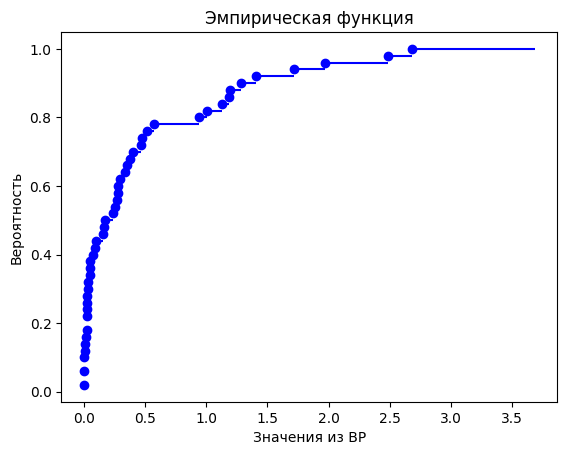

In [535]:
# Построение эмпирической функции распределения

# variation_series - пары, где ключ - элемент из sorted_data, а значение - количество повторений элемента
variation_series = list(Counter(sorted_data).items())

x = [item[0] for item in variation_series]
y = np.cumsum([item[1] for item in variation_series]) / len(data)


plt.title('Эмпирическая функция')
plt.xlabel('Значения из ВР')
plt.ylabel('Вероятность')

for i in range(len(x)):
    plt.plot(x[i], y[i], marker='o', color='blue')
    if i == 0:
        plt.hlines(y[i], 0, x[i + 1], linestyle='-', color='blue')
    elif i == (len(x) - 1):
        plt.hlines(y[i], x[i], x[i] + 1, linestyle='-', color='blue')
    else:
        plt.hlines(y[i], x[i], x[i+1], linestyle='-', color='blue')



plt.show()

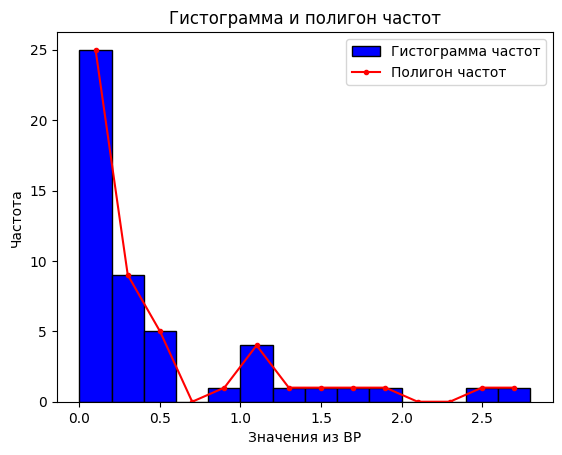

In [536]:
# Построение гистограммы и полгона частот с шагом h

h = 0.2
bins = np.arange(min(sorted_data), max(sorted_data) + h, h)

plt.title('Гистограмма и полигон частот')
plt.xlabel('Значения из ВР')
plt.ylabel('Частота')
plt.hist(sorted_data, bins=bins, color='blue', edgecolor='black', label='Гистограмма частот')
plt.plot(bins[:-1] + h / 2, np.histogram(sorted_data, bins=bins)[0], marker='.', color='red', linestyle='-',label='Полигон частот')


plt.legend()
plt.show()

#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математическое ожидание, (ii) дисперсия, (iii) СКО, (iv) медиана, (v) асимметрия, (vi) эксцесса (vii) вероятности $\mathbb{P}(X\in \left[ c, d \right])$ 


In [537]:
c = 0.0
d = 0.64

# (i) Математическое ожидание
mean_val = np.mean(data)
print(f"Математическое ожидание: {mean_val}")

# (ii) Дисперсия
variance_val = np.var(data)
print(f"Дисперсия: {variance_val}")

# (iii) СКО
std_val = np.std(data)
print(f"СКО: {std_val}")

# (iv) Медиана
median_val = np.median(data)
print(f"Медиана: {median_val}")

# (v) Асимметрия
skewness_val = stats.skew(data)
print(f"Асимметрия: {skewness_val}")

# (vi) Эксцесс
kurtosis_val = stats.kurtosis(data)
print(f"Эксцесс: {kurtosis_val}")

# # (vii) P(X в [a, b])
probability_val = np.mean((data >= c) & (data <= d))
print(f"P(X в [{c}, {d}]): {probability_val}")



Математическое ожидание: 0.4660399999999999
Дисперсия: 0.42346699840000007
СКО: 0.6507434197900123
Медиана: 0.20400000000000001
Асимметрия: 1.835576441036888
Эксцесс: 2.7410994663055357
P(X в [0.0, 0.64]): 0.78


#### c) В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметра $\lambda$, и соответствующую оценку по методу моментов. Найти смещение оценок.

Плотность распределения показательного распределения: $p(X) = \lambda \cdot exp(-\lambda X), X \ge 0$
Условие $X \ge 0$ выполняется для данной выборки, индикатором можно пренебречь

a) ОМП

Составим функцию правдоподобия
$L(\overrightarrow{X};\theta)
=\prod_{i=1}^{n}p(X_{i})=
\prod_{i=1}^{n} \lambda \cdot exp(-\lambda X)=
\lambda^{n} \cdot exp(-\lambda \sum_{i=1}^{n}X_i)$

Прологарифмируем функцию правдоподобия

$LL(\overrightarrow{X};\theta)= n\ln(\lambda)-\lambda \sum_{i=1}^{n}X_i$

Найдем производную логарифма функции правдоподобия по параметру $\lambda$

$\frac{\partial}{\partial\lambda} LL(\overrightarrow{X};\theta) = \frac{n}{\lambda} - \sum_{i=1}^{n}X_i$

Приравняем производную к нулю и решим уравнение для нахождения оценки параметра $\lambda$

$\frac{n}{\lambda} - \sum_{i=1}^{n}X_i = 0$

$\widehat{\lambda} = \frac{1}{\overline{X}} = 2.15$

б) ОММ
Математическое ожидание для показательного распределения

$\mathbb{E}X = \frac{1}{\lambda}$

Выберем момент

$M_{1}=\overline{X}$

Получаем, что

$\widetilde{\lambda}=\frac{1}{\overline{X}}=\widetilde{\theta}=2.15$

Найдем смещение оценок

Показательное распределение принадлежит экспоненциальному семейству распределений, поэтому МДС $\left( \sum_{i=1}^n X_i \right)$ является ПДС 


$\mathbb{E}\widehat{λ} = n\mathbb{E}\frac1{\sum_{i=1}^n X_i} $

$ \sum_{i=1}^n X_i \sim Gamma(n, \frac1{\lambda}) $

$ n \mathbb{E}\frac{1}{\sum_{i=1}^n X_i}=n(\frac1{\lambda})^{-1} \frac{Г(-1+n)}{Г(n)}=\frac{n\lambda}{n-1} = 0.476$ - оценка смещенная

$ \widehat{\widehat{λ}}=\frac{(n-1)\overline{X}}{n}= 0.457 $


#### d) Построить асимптотический  доверительный  интервал  уровня  значимости  $\alpha_{2}$ для  параметра  $\lambda$  на  базе  оценки максимального правдоподобия.

$\alpha_{2} = 0.1$

ОМП из прошлого пункта

$\widehat{\theta}=\frac{1}{\overline{X}}$

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$

Найдем информацию Фишера: 

$I_{n}(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left(-\frac{n}{\lambda^{2}}\right)= \frac{n}{\lambda^{2}}$

$I(\theta) = \lim_{n \to \infty} \left(\frac{I_{n}(\theta)}{n}\right) = \frac{1}{\lambda^{2}}$

Тогда 

$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем 

$X_{\alpha_{2}}$: $\mathrm{Ф}(X_{\alpha_{2}})=1-\frac{\alpha_{2}}{2}=1-\frac{0.1}{2}=0.95$ 

Найдем $X_{0.1}$



In [538]:
X_alpha = stats.norm.ppf(0.95)

print(f'X_{0.1} = {X_alpha:.2f}')

X_0.1 = 1.64


Ассимптотический доверительный интервал

$\lambda \in \left[ \widehat{\theta}(\overrightarrow{X}) - \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}} , \widehat{\theta}(\overrightarrow{X}) + \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}}\right]$

$\lambda \in \left[ 2.15 - \frac{1.64}{\sqrt{50 \cdot \frac{1}{0.466^2}}} , 2.15 + \frac{1.64}{\sqrt{50 \cdot \frac{1}{0.466^2}}}\right]$

In [539]:
a = 1.64 / np.sqrt(50 * 1 / 0.466**2);

print("Ассимптотический доверительный интервал параметра λ")
print(f'{2.15-a} <= λ <= {2.15+a}')

Ассимптотический доверительный интервал параметра λ
2.0419201427091984 <= λ <= 2.2580798572908014


#### e) С использованием теоремы Колмагорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_{0}$. Проверить гипотезу на уровне значимости $\alpha_{2}$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу

Статистика критерия Колмагорова $D_{n} = \sup_{x \in \mathbb{R}} | F_n(x) - F_0(x)|$

Теорема Колмагорова $\sqrt{n}D_n \rightarrow K$ при основной гипотезе


In [540]:
lambda_0 = 0.48
alpha_2 = 0.1



D, p_value = stats.kstest(sorted_data, 'expon', args=(0, 1/lambda_0), alternative='two-sided')


print(f"D: {D}")
print(f"sqrt(n)*D: {np.sqrt(len(sorted_data)) * D}")
print(f"p-value: {p_value}")
print(f"Квантиль Колмагорова {1 - alpha_2}: {stats.kstwobign.ppf(1 - alpha_2)}")



D: 0.5402350956751844
sqrt(n)*D: 3.8200389958688614
p-value: 3.456671186585922e-14
Квантиль Колмагорова 0.9: 1.2238478702170825


Поскольку $\sqrt{n}D_n > d_{0.9}$, то гипотеза отвергается

Наибольший уровень значимости, при котором нет основания отвергнуть гипотезу 3.456671186585922e-14

#### f) Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_{0}$.  Проверить  гипотезу  на  уровне  значимости  $\alpha_{2}$.  Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Были выбраны интервалы с шагом 0.2



In [541]:

def hypothesisTestExp(lambda_0, alpha_2, df):
    
    # Интервалы (правый край включен)
    bins = np.arange(min(sorted_data), max(sorted_data) + h  , h)
    intervals = [(start, end) for start, end in zip(bins[:-1], bins[1:])]
    intervals.pop()
    intervals.append((2.6, np.inf))
    print(f"Интервалы {intervals}")
    
    # Гистограмма частот
    hist = np.histogram(sorted_data, bins=bins)[0]
    print(f"Частоты {hist}")
    
    #Ожидаемые вероятности
    expected_freq = [( (math.exp(-lambda_0*intervals[i][0])) - ( math.exp(-lambda_0*intervals[i][1]))) for i in range(len(intervals) - 1)]
    #Ожидаемая вероятность последнего интервала
    expected_freq.append(1 - sum(expected_freq))
    print(f"Ожидаемые вероятности {expected_freq}")
    print(f"Сумма вероятностей {sum(expected_freq)}")
    
    #Вычисление критерия chi^2
    chi = 0
    for i in range(len(intervals)):
        chi += ((bins[i] - len(data)*expected_freq[i])**2) / (len(data)*expected_freq[i])
    
    x_alpha = stats.chi2.ppf(1 - alpha_2, df)
    
    print(f"Критерий X^2: {chi}")
    print(f"Критическое значение: {x_alpha}")
    
    
    print(f"p value= {1 - stats.chi2.cdf(chi, df)}")

    
hypothesisTestExp(lambda_0=0.48, alpha_2=0.1, df= 14 - 1)


Интервалы [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6000000000000001), (0.6000000000000001, 0.8), (0.8, 1.0), (1.0, 1.2000000000000002), (1.2000000000000002, 1.4000000000000001), (1.4000000000000001, 1.6), (1.6, 1.8), (1.8, 2.0), (2.0, 2.2), (2.2, 2.4000000000000004), (2.4000000000000004, 2.6), (2.6, inf)]
Частоты [25  9  5  0  1  4  1  1  1  1  0  0  1  1]
Ожидаемые вероятности [0.09153598393129381, 0.08315714757702386, 0.07554527625264107, 0.06863016505949415, 0.062348035373406274, 0.0566409466093184, 0.051456261830634564, 0.04674616227454115, 0.04246720631572909, 0.038579928800805574, 0.03504847705802466, 0.03184028022522495, 0.02892574884616078, 0.2870783798457017]
Сумма вероятностей 1.0
Критерий X^2: 28.375115367102588
Критическое значение: 19.81192930712756
p value= 0.008019599253325849


$\mathcal{X^{2}} > \mathcal{X_{0.1, 13}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу 0.008019599253325849.

#### g) Построить критерий значимости $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу на уровне значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

В качестве параметра возьмем оценку ОМП $ \widehat{λ}= \frac{1}{\overline{X}}=2.15 $

In [542]:
hypothesisTestExp(lambda_0=2.15, alpha_2=0.1, df= 14 - 1 - 1)

Интервалы [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6000000000000001), (0.6000000000000001, 0.8), (0.8, 1.0), (1.0, 1.2000000000000002), (1.2000000000000002, 1.4000000000000001), (1.4000000000000001, 1.6), (1.6, 1.8), (1.8, 2.0), (2.0, 2.2), (2.2, 2.4000000000000004), (2.4000000000000004, 2.6), (2.6, inf)]
Частоты [25  9  5  0  1  4  1  1  1  1  0  0  1  1]
Ожидаемые вероятности [0.3494909052766835, 0.2273470124055677, 0.1478912992279965, 0.09620463517825911, 0.06258199013799626, 0.040710153750651484, 0.02648232526238333, 0.01722699343260138, 0.01120631590264605, 0.007289810413013785, 0.004742087972474211, 0.0030847713540725205, 0.0020066718209661347, 0.0037350278646880453]
Сумма вероятностей 1.0
Критерий X^2: 173.07330648969491
Критическое значение: 18.549347786703244
p value= 0.0


$\mathcal{X^{2}} > \mathcal{X_{0.1, 12}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу сильно близок к нулю.

#### h) Построить наиболее мощный критерий проверки простой гипотезы показательности с параметром $\lambda = \lambda_0$ при альтернативе показательности с параметром $\lambda = \lambda_1$.  Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами  основную и альтернативную гипотезы?

Основная гипотеза
$H_{0}: \lambda = \lambda_{0} = 0.48$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{1} = 1.43$

$L(\overrightarrow{X};\lambda)= \lambda^{n} \cdot exp(-\lambda\sum_{i = 1}^{n} X_{i} )$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_0, \lambda_1) = \left(\frac{\lambda_1}{\lambda_0}\right)^{n} \cdot exp(\sum_{i=1}^{n}X_i\left(\lambda_0 - \lambda_1 \right) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=\frac{1}{\lambda_0}, \sigma^{2}=\frac{1}{\lambda_0}$

$ \sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_0}}{\sqrt{\frac{1}{\lambda_0}}} \sim N(0,1)$

$ P\left(\sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_0}}{\sqrt{\frac{1}{\lambda_0}}} ≥ \sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{1}{\lambda_0}}}\right)=1-Ф\left(\sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{1}{\lambda_0}}}\right)= α$

$\sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{1}{\lambda_0}}}=x_α$

$x_α: Ф(x_α)=1-α $

In [543]:
print(f'Квантиль N(0,1) с уровнем доверия 1 - alpha_2: {stats.norm.ppf(0.9, loc=0, scale=1)}')

Квантиль N(0,1) с уровнем доверия 1 - alpha_2: 1.2815515655446004


Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - \frac{1}{0.48}}{\sqrt\frac{1}{0.48}} = 1.28$

$c^{*} = 2.34$

$\overline{X} = 0.466$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 

Поменяем гипотезы местами

Основная гипотеза
$H_{0}: \lambda = \lambda_{1} = 1.43$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{0} = 0.48$

$L(\overrightarrow{X};\lambda)= \lambda^{n} \cdot exp(-\lambda\sum_{i = 1}^{n} X_{i} )$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_1, \lambda_0) = \left(\frac{\lambda_0}{\lambda_1}\right)^{n} \cdot exp(\sum_{i=1}^{n}X_i\left(-\lambda_0 + \lambda_1 \right) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=\frac{1}{\lambda_1}, \sigma^{2}=\frac{1}{\lambda_1}$

$ \sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_1}}{\sqrt{\frac{1}{\lambda_1}}} \sim N(0,1)$

$ P\left(\sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_1}}{\sqrt{\frac{1}{\lambda_1}}} ≥ \sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{1}{\lambda_1}}}\right)=1-Ф\left(\sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{1}{\lambda_1}}}\right)= α$

$\sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{1}{\lambda_1}}}=x_α$

$x_α: Ф(x_α)=1-α $

$x_a = 1.28$

Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - \frac{1}{1.43}}{\sqrt\frac{1}{1.43}} = 1.28$

$c^{*} = 0.85$

$\overline{X} = 0.466$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 

### i) В пунктах (c)-(h) заменить семейство показательных распределений на семейство гамма-распределений с плотностями $p_{\lambda}(x) = \frac{\sqrt{\lambda}\cdot exp\left( \frac{-\lambda x}{2} \right)}{\sqrt{2\pi x}}$

#### h.c) 

Плотность распределения показательного распределения: $p(X) = \lambda \cdot exp(-\lambda X), X \ge 0$
Условие $X \ge 0$ выполняется для данной выборки, индикатором можно пренебречь

a) ОМП

Составим функцию правдоподобия
$L(\overrightarrow{X};\theta)
=\prod_{i=1}^{n}p(X_{i})= \frac{\lambda^{\frac{n}{2}} \cdot \exp\left(-\frac{\lambda}{2} \sum_{i = 1}^{n} X_i\right)}{(2 \pi )^{\frac{n}{2}} \prod_{i=1}^{n} \sqrt{X_i}}$

Прологарифмируем функцию правдоподобия

$LL(\overrightarrow{X};\theta)= \frac{n}{2}\ln{\lambda} - \frac{\lambda}{2}\sum_{i = 1}^n X_i - \frac{n}{2}\ln{2\pi} - \frac{1}{2}\sum_{i = 1}^n \ln{X_i}$

Найдем производную логарифма функции правдоподобия по параметру $\lambda$

$\frac{\partial}{\partial\lambda} LL(\overrightarrow{X};\theta) = \frac{n}{2\lambda} - \frac{1}{2}\sum_{i = 1}^n X_i$

Приравняем производную к нулю и решим уравнение для нахождения оценки параметра $\lambda$

$ \frac{n}{2\lambda} - \frac{1}{2}\sum_{i = 1}^n X_i = 0$

$\widehat{\lambda} = \frac{1}{\overline{X}} = 2.15$

б) ОММ
Математическое ожидание для показательного распределения

$\mathbb{E}X = \frac{1}{\lambda}$

Выберем момент

$M_{1}=\overline{X}$

Получаем, что

$\widetilde{\lambda}=\frac{1}{\overline{X}}=\widetilde{\theta}=2.15$

Найдем смещение оценок

Показательное распределение принадлежит экспоненциальному семейству распределений, поэтому МДС $\left( \sum_{i=1}^n X_i \right)$ является ПДС 


$\mathbb{E}\widehat{λ} = n\mathbb{E}\frac1{\sum_{i=1}^n X_i} $

$ \sum_{i=1}^n X_i \sim Gamma(n, \frac1{\lambda}) $

$ n \mathbb{E}\frac{1}{\sum_{i=1}^n X_i}=n\left(\frac{1}{\lambda}\right)^{-1} \frac{Г(-1+n)}{Г(n)}=\frac{n\lambda}{n-1} = 0.476$ - оценка смещенная

$ \widehat{\widehat{λ}}=\frac{(n-1)\overline{X}}{n}= 0.457 $


#### h.d)

$\alpha_{2} = 0.1$

ОМП из прошлого пункта

$\widehat{\theta}=\frac{1}{\overline{X}}$

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$

Найдем информацию Фишера: 

$I_{n}(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left(-\frac{n}{2\lambda^{2}}\right)= \frac{n}{2\lambda^{2}}$

$I(\theta) = \lim_{n \to \infty} \left(\frac{I_{n}(\theta)}{n}\right) = \frac{1}{2\lambda^{2}}$

Тогда 

$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем 

$X_{\alpha_{2}}$: $\mathrm{Ф}(X_{\alpha_{2}})=1-\frac{\alpha_{2}}{2}=1-\frac{0.1}{2}=0.95$ 

Найдем $X_{0.1}$


In [544]:
X_alpha = stats.norm.ppf(0.95)

print(f'X_{0.1} = {X_alpha:.2f}')

X_0.1 = 1.64


Ассимптотический доверительный интервал

$\lambda \in \left[ \widehat{\theta}(\overrightarrow{X}) - \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}} , \widehat{\theta}(\overrightarrow{X}) + \frac{X_{\alpha}}{\sqrt{n \cdot I(\widehat{\theta})}}\right]$

$\lambda \in \left[ 2.15 - \frac{1.64}{\sqrt{50 \cdot \frac{1}{2 \cdot 0.466^2}}} , 2.15 + \frac{1.64}{\sqrt{50 \cdot \frac{1}{2 \cdot0.466^2}}}\right]$

In [545]:
a = 1.64 / np.sqrt(50 * 1 / (2 * 0.466**2));

print("Ассимптотический доверительный интервал параметра λ")
print(f'{2.15-a} <= λ <= {2.15+a}')

Ассимптотический доверительный интервал параметра λ
1.9971519999999998 <= λ <= 2.302848


#### h.e)

Статистика критерия Колмагорова $D_{n} = \sup_{x \in \mathbb{R}} | F_n(x) - F_0(x)|$
Теорема Колмагорова $\sqrt{n}D_n \rightarrow K$ при основной гипотезе

In [546]:
lambda_0 = 0.48
alpha_2 = 0.1
df = 1



D, p_value = stats.kstest(sorted_data, 'chi2', args=(df, ), alternative='two-sided')


print(f"D: {D}")
print(f"sqrt(n)*D: {np.sqrt(len(sorted_data)) * D}")
print(f"p-value: {p_value}")
print(f"Квантиль Колмагорова {1 - alpha_2}: {stats.kstwobign.ppf(1 - alpha_2)}")



D: 0.2321242096731584
sqrt(n)*D: 1.641366027374583
p-value: 0.007492996613807534
Квантиль Колмагорова 0.9: 1.2238478702170825


Поскольку $\sqrt{n}D_n > d_{0.9}$, то гипотеза отвергается

Наибольший уровень значимости, при котором нет основания отвергнуть гипотезу 0.007492996613807534

#### h.f)
Были выбраны интервалы с шагом 0.2

In [547]:

def hypothesisTestChi(lambda_0, alpha_2, df):
    
    # Интервалы (правый край включен)
    bins = np.arange(min(sorted_data), max(sorted_data) + h  , h)
    intervals = [(start, end) for start, end in zip(bins[:-1], bins[1:])]
    intervals.pop()
    intervals.append((2.6, np.inf))
    print(f"Интервалы {intervals}")
    
    # Гистограмма частот
    hist = np.histogram(sorted_data, bins=bins)[0]
    print(f"Частоты {hist}")
    
    #Ожидаемые вероятности
    expected_freq = [stats.chi2.cdf(intervals[i][1], df=1, scale=lambda_0) - stats.chi2.cdf(intervals[i][0], df=1, scale=lambda_0) for i in range(len(intervals) - 1)]
    expected_freq.append(1 - sum(expected_freq))
    print(f"Ожидаемые вероятности {expected_freq}")
    print(f"Сумма вероятностей {sum(expected_freq)}")
    
    #Вычисление критерия chi^2
    chi = 0
    for i in range(len(intervals)):
        chi += ((bins[i] - len(data)*expected_freq[i])**2) / (len(data)*expected_freq[i])
    
    x_alpha = stats.chi2.ppf(1 - alpha_2, df)
    
    print(f"Критерий X^2: {chi}")
    print(f"Критическое значение: {x_alpha}")
    
    
    print(f"p value= {1 - stats.chi2.cdf(chi, df)}")

    
hypothesisTestChi(lambda_0=0.48, alpha_2=0.1, df= 14 - 1)


Интервалы [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6000000000000001), (0.6000000000000001, 0.8), (0.8, 1.0), (1.0, 1.2000000000000002), (1.2000000000000002, 1.4000000000000001), (1.4000000000000001, 1.6), (1.6, 1.8), (1.8, 2.0), (2.0, 2.2), (2.2, 2.4000000000000004), (2.4000000000000004, 2.6), (2.6, inf)]
Частоты [25  9  5  0  1  4  1  1  1  1  0  0  1  1]
Ожидаемые вероятности [0.4813949835712746, 0.15729458790254652, 0.09775795124320652, 0.06684687482402552, 0.047790929280185246, 0.03506837517210393, 0.026177502876728376, 0.019779640268100307, 0.015081643445715498, 0.011580678078949691, 0.008942479426397032, 0.006937035233298472, 0.005401915282009284, 0.019945403395459027]
Сумма вероятностей 1.0
Критерий X^2: 77.66050273253794
Критическое значение: 19.81192930712756
p value= 3.032318840467951e-11


$\mathcal{X^{2}} > \mathcal{X_{0.1, 13}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу 3.032318840467951e-11

#### h.g) 
В качестве параметра возьмем оценку ОМП $ \widehat{λ}= \frac{1}{\overline{X}}=2.15 $


In [548]:
 hypothesisTestChi(lambda_0=2.15, alpha_2=0.1, df=14 - 1 - 1)

Интервалы [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6000000000000001), (0.6000000000000001, 0.8), (0.8, 1.0), (1.0, 1.2000000000000002), (1.2000000000000002, 1.4000000000000001), (1.4000000000000001, 1.6), (1.6, 1.8), (1.8, 2.0), (2.0, 2.2), (2.2, 2.4000000000000004), (2.4000000000000004, 2.6), (2.6, inf)]
Частоты [25  9  5  0  1  4  1  1  1  1  0  0  1  1]
Ожидаемые вероятности [0.23963166994479723, 0.09414068464558423, 0.06891607221534668, 0.055445977407020286, 0.04662306562950558, 0.040231705223472525, 0.03531356682478859, 0.03137402913056009, 0.028127095592922813, 0.02539363110119819, 0.023054538395398727, 0.02102688435870892, 0.01925074097948032, 0.27147033855121583]
Сумма вероятностей 1.0
Критерий X^2: 35.54944801274168
Критическое значение: 18.549347786703244
p value= 0.0003826538155790038


$\mathcal{X^{2}} > \mathcal{X_{0.1, 12}} \rightarrow$ гипотеза отвергается

Наибольший уровень значимости, при котором еще нет оснований отвергнуть гипотезу 0.0003826538155790038

#### h.h) 

Основная гипотеза
$H_{0}: \lambda = \lambda_{0} = 0.48$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{1} = 1.43$

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}p(X_{i})= \frac{\lambda^{\frac{n}{2}} \cdot \exp\left(-\frac{\lambda}{2} \sum_{i = 1}^{n} X_i\right)}{(2 \pi )^{\frac{n}{2}} \prod_{i=1}^{n} \sqrt{X_i}}$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_0, \lambda_1) = \left(\frac{\lambda_1}{\lambda_0}\right)^{\frac{n}{n}} \cdot exp\left(\frac{\sum_{i=1}^{n}X_i}{2}\left(\lambda_0 - \lambda_1 \right)\right) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=ab, \sigma^{2}=ab^{2}$

В данном случае $a = \frac{1}{2}, b = \frac{2}{\lambda}$ 

$ \sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_0^{2}}}} \sim N(0,1)$

$ P\left(\sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_0^{2}}}} ≥ \sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_0^{2}}}}\right)=1-Ф\left(\sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_0^{2}}}}\right)= α$

$\sqrt{n} \frac{ c^*-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_0^{2}}}}=x_α$

$x_α: Ф(x_α)=1-α $

In [549]:
print(f'Квантиль N(0,1) с уровнем доверия 1 - alpha_2: {stats.norm.ppf(0.9, loc=0, scale=1)}')

Квантиль N(0,1) с уровнем доверия 1 - alpha_2: 1.2815515655446004


Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - \frac{1}{0.48}}{\sqrt\frac{2}{0.48^{2}}} = 1.28$

$c^{*} = 2.61$

$\overline{X} = 0.466$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 

Поменяем гипотезы местами

Основная гипотеза
$H_{0}: \lambda = \lambda_{1} = 1.43$

Альтернативная гипотеза
$H_{1}: \lambda = \lambda_{0} = 0.48$

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}p(X_{i})= \frac{\lambda^{\frac{n}{2}} \cdot \exp\left(-\frac{\lambda}{2} \sum_{i = 1}^{n} X_i\right)}{(2 \pi )^{\frac{n}{2}} \prod_{i=1}^{n} \sqrt{X_i}}$

Статическое отношение правдоподобия

$LR(\overrightarrow{X};\lambda_1, \lambda_0) = \left(\frac{\lambda_0}{\lambda_1}\right)^{\frac{n}{n}} \cdot exp\left(\frac{\sum_{i=1}^{n}X_i}{2}\left(\lambda_1 - \lambda_0 \right)\right) > c$

В силу монотонности статистики LR относительно МДС

$LR(\overrightarrow{X}) > c \leftrightarrow \overline{X} < c^{*}$

$LR(\overrightarrow{X}) < c \leftrightarrow \overline{X} > c^{*}$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, \overline{X} < c^{*} \\
    p, \overline{X} = c^{*} \\
    0, \overline{X} > c^{*} \\
  \end{array}\right.$
  
По ЦПТ:

$ \sqrt{n} \frac{ \overline{X}-\mu}{\sigma} \sim N(0,1)$

$ \mu=ab, \sigma^{2}=ab^{2}$

В данном случае $a = \frac{1}{2}, b = \frac{2}{\lambda}$ 

$ \sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_1}}{\sqrt{\frac{2}{\lambda_1^{2}}}} \sim N(0,1)$

$ P\left(\sqrt{n} \frac{ \overline{X}-\frac{1}{\lambda_0}}{\sqrt{\frac{2}{\lambda_1^{2}}}} ≥ \sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{2}{\lambda_1^{2}}}}\right)=1-Ф\left(\sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{2}{\lambda_1^{2}}}}\right)= α$

$\sqrt{n} \frac{ c^*-\frac{1}{\lambda_1}}{\sqrt{\frac{2}{\lambda_1^{2}}}}=x_α$

$x_{\alpha}: Ф(x_α)=1-α $
$x_{\alpha} = 1.28$

Найдем $c^{*}$
$\sqrt{50} \cdot \frac{c^{*} - \frac{1}{1.43}}{\sqrt\frac{2}{1.43^{2}}} = 1.28$

$c^{*} = 0.87$

$\overline{X} = 0.466$

$\overline{X} < c^{*} \leftrightarrow H_{0}$ отвергаем $H_{1}$ принимаем 

## Выводы

В ходе лабораторной работы были применены методы математической статистики для визуализации и анализа полученных данных, сформированны навыки реализации методов с помощью прикладных программных пакетов. Были рассчитаны выборочные числовые характеристики, найдены ОМП и ОММ, ассимптотические доверительные интервалы, построены критерии значимости кси-квадрат, проверены простые и сложные гипотезы согласия с разными распредлениями и параметрами, построены наиболее мощные критерии для проверки простых гипотез. Так-же были изучены программные пакеты, помогающие анализировать и визуализировать данные.
